MH = Mental Health, 
Org = Organisation 

Assumed that if "Sought any MH treatment?"  this is asked to people who have some mental condition so
taking this as target and predciting accrodinly


Importing required Libraries which is used in the project they are as follows:

1. pandas (pd): The pandas library is used for data manipulation and analysis. It provides powerful data structures and tools to work with structured data. In this code, pandas is used to read the dataset from a CSV file, perform one-hot encoding to convert categorical variables, and handle missing values using the fillna() method.

2. seaborn (sns): Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. In this code, Seaborn is used to create a heatmap for visualizing correlations between features.

3. matplotlib.pyplot (plt): matplotlib is a popular plotting library used to create varsklearn.metrics (accuracy_score, classification_report): ious types of visualizations in Python. The pyplot module provides an interface for creating plots, figures, and other graphical representations. In this code, it's used to create box plots and heatmaps for visualization.

4. sklearn.model_selection (train_test_split): The train_test_split function from Scikit-Learn is used to split the dataset into training and testing subsets. This separation helps in training the model on one subset and evaluating its performance on another, unseen subset.

5. sklearn.ensemble (RandomForestClassifier): The RandomForestClassifier is a machine learning model from Scikit-Learn's ensemble module. It's used to build a Random Forest model, which is an ensemble of decision trees. The model is trained on the training data and used to make predictions.

6. sklearn.metrics (accuracy_score, classification_report): The accuracy_score function is used to calculate the accuracy of the model's predictions. The classification_report function generates a detailed classification report, including precision, recall, F1-score, and support for each class. These metrics provide insights into the performance of the model.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To load the dataset, used the pd.read_csv() function from the pandas library. Then, we have used the head() function to display the top 5 rows of the loaded data and to confirm that the loaded data is correct.  

In [2]:
data = pd.read_excel("OSMIsurvey2014.xlsx")
data.head()

,Age,Gender,Country,self-employed?,Any family history of mental illness?,Sought any MH treatment?,"If MH condition, do you feel that it interferes with your work?",work remotely at least 50% of the time?,your employer a tech Org?,Org provide MH benefits?,Org ever discussed MH as part of an employee wellness program?,How easy to take medical leave for a MH condition?,Do you think that discussing a MH issue with your employer would have negative consequences?,Do you think that discussing a PH issue with your employer would have negative consequences?,Would you be willing to discuss a MH issue with your coworkers?,Would you be willing to discuss MH issue with your direct supervisor(s)?,Would you bring up a MH issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your Org takes MH as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
0,37,Female,United States,NaN,No,Yes,Often,No,Yes,Yes,No,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,No,Yes,No,No,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,No,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,Yes,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


The dataset exhibits columns containing categorical values, which necessitates the application of data preprocessing techniques to make it compatible with machine learning algorithms.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 20 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Age                                                                                                                 1260 non-null   int64 
 1   Gender                                                                                                              1260 non-null   object
 2   Country                                                                                                             1260 non-null   object
 3   self-employed?                                                                                                      1242 non-null   object
 4   Any family history of me

To gain deeper insights into the dataset, we employed the built-in `info()` function. This function provides comprehensive information about the data, encompassing details such as data types and the presence of non-null values.

We are uisng isnull() function to check the null values. and then by using the sum() funtion we are counting the total no. of  null values in the given dataset.

In [4]:
data.isnull().sum()

Age                                                                                                                     0
Gender                                                                                                                  0
Country                                                                                                                 0
self-employed?                                                                                                         18
Any family history of mental illness?                                                                                   0
Sought any MH treatment?                                                                                                0
If MH condition, do you feel that it interferes with your work?                                                       264
 work remotely at least 50% of the time?                                                                                0
your employer a tech Org

# We've generated a sample dataframe containing missing values
data_m = data['If MH condition, do you feel that it interferes with your work?'] #: ['Sometimes', 'Never', 'Rarely', None, 'Often', 'Sometimes', None, 'Sometimes']}
df = pd.DataFrame(data_m)

# Step 1: Determine the proportions of each category
category_counts = df['If MH condition, do you feel that it interferes with your work?'].value_counts()
proportions = category_counts / category_counts.sum()

# Step 2: Utilize the proportions to randomly replace the missing values
missing_indices = df['If MH condition, do you feel that it interferes with your work?'].isnull()
num_missing_values = missing_indices.sum()
fill_values = random.choices(proportions.index, proportions.values, k=num_missing_values)
df.loc[missing_indices, 'If MH condition, do you feel that it interferes with your work?'] = fill_values

### Despite implementing this method, the accuracy does not exhibit significant improvement. Interestingly, the accuracy appears to be more favorable when simply substituting the null values with zeros.

In [5]:
data.fillna(0)

,Age,Gender,Country,self-employed?,Any family history of mental illness?,Sought any MH treatment?,"If MH condition, do you feel that it interferes with your work?",work remotely at least 50% of the time?,your employer a tech Org?,Org provide MH benefits?,Org ever discussed MH as part of an employee wellness program?,How easy to take medical leave for a MH condition?,Do you think that discussing a MH issue with your employer would have negative consequences?,Do you think that discussing a PH issue with your employer would have negative consequences?,Would you be willing to discuss a MH issue with your coworkers?,Would you be willing to discuss MH issue with your direct supervisor(s)?,Would you bring up a MH issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your Org takes MH as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
0,37,Female,United States,0,No,Yes,Often,No,Yes,Yes,No,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,0,No,No,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,0,No,No,Rarely,No,Yes,No,No,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,0,Yes,Yes,Often,No,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,0,No,No,Never,Yes,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,Male,United States,No,Yes,Yes,Often,Yes,Yes,Yes,No,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,No,Yes,Yes,No,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,0,Yes,Yes,No,No,Don't know,Yes,No,No,No,No,No,No,No
1258,25,Male,United States,No,Yes,Yes,Sometimes,No,No,Yes,No,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


After conducting a thorough analysis of the data, we've identified that the "gender" column contains a multitude of distinct values, which could potentially impact the accuracy of our results. To address this, we've executed the `value_counts()` function to obtain a tally of occurrences for each value within the column. Subsequently, we've utilized the `unique()` function to generate an array, revealing the specifics of the unique values found in the column.

In [6]:
data['Gender'].value_counts()

Male                                              616
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [7]:
data["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

### Employing regular expression functions, we're in the process of eliminating spaces and special characters. Our aim is to classify the contents of this column into three broad categories: male, female, and others.

In [8]:
# Remove spaces and special characters from the specified column
data['Gender'] = data['Gender'].str.replace(r'\s+|[^A-Za-z0-9]+', '', regex=True)
# Replace words starting with 'M' (case-insensitive) with 'M
data['Gender'] = data['Gender'].str.replace(r'\bM\w+', 'M', regex=True, case=False)
data['Gender'] = data['Gender'].str.replace(r'\bF\w+', 'F', regex = True, case = False)
data['Gender'] = data['Gender'].str.replace('f', 'F').str.replace('m', 'M')
data['Gender'] = data['Gender'].replace({'WoMan': 'F','woMan' :'F'})

#Taking all other gender in one section as Other 
data['Gender'] = np.where(data['Gender'].isin(['M', 'F']), data['Gender'], 'Other')

In [9]:
data["Gender"].unique()

array(['F', 'M', 'Other'], dtype=object)

### Likewise, within a specific column, an excessive number of distinct values have emerged, each exhibiting a notably low frequency. Even after accommodating all these values, our model's accuracy did not exhibit any substantial enhancement. Consequently, we've made the decision to exclude values with a frequency of less than 10 from consideration.

In [10]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  22
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [11]:
data['Country'].nunique()

48

In [12]:
value_counts = data['Country'].value_counts()

Variables_to_remove = value_counts[value_counts < 10].index

data = data[~data['Country'].isin(Variables_to_remove)]

In [13]:
data['Country'].value_counts()

United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          22
France             13
India              10
Name: Country, dtype: int64

In [14]:
data.head()

,Age,Gender,Country,self-employed?,Any family history of mental illness?,Sought any MH treatment?,"If MH condition, do you feel that it interferes with your work?",work remotely at least 50% of the time?,your employer a tech Org?,Org provide MH benefits?,Org ever discussed MH as part of an employee wellness program?,How easy to take medical leave for a MH condition?,Do you think that discussing a MH issue with your employer would have negative consequences?,Do you think that discussing a PH issue with your employer would have negative consequences?,Would you be willing to discuss a MH issue with your coworkers?,Would you be willing to discuss MH issue with your direct supervisor(s)?,Would you bring up a MH issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your Org takes MH as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
0,37,F,United States,NaN,No,Yes,Often,No,Yes,Yes,No,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,M,Canada,NaN,No,No,Rarely,No,Yes,No,No,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,M,United Kingdom,NaN,Yes,Yes,Often,No,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,M,United States,NaN,No,No,Never,Yes,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### In the initial stages, an attempt was made to enhance model performance by amalgamating similar variables. However, this approach inadvertently resulted in a reduction in model accuracy. Subsequently, it was decided to discontinue this strategy, and the variables were left unaltered to maintain the integrity of the accuracy levels.

data["How easy to take medical leave for a MH condition?"] = data["How easy to take medical leave for a MH ].replace({'Somewhat easy':'Easy','Very easy' : 'Easy', 'Somewhat difficult': 'Hard', 'Very difficult': 'Hard'})

### Reviewing the distinct values within the remaining columns, it appears that they are satisfactory, and there is no need to remove or substitute any values. Thus, we can continue without making any alterations in this regard.

In [15]:
data['Any family history of mental illness?'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
data['Sought any MH treatment?'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
data['self-employed?'].value_counts()

No     1008
Yes     127
Name: self-employed?, dtype: int64

In [18]:
data['If MH condition, do you feel that it interferes with your work?'].value_counts()

Sometimes    437
Never        194
Rarely       156
Often        129
Name: If MH condition, do you feel that it interferes with your work?, dtype: int64

In [19]:
data["Do you think that discussing a MH issue with your employer would have negative consequences?"].value_counts()

No       444
Maybe    444
Yes      264
Name: Do you think that discussing a MH issue with your employer would have negative consequences?, dtype: int64

In [20]:
data[" work remotely at least 50% of the time?"].value_counts()

No     810
Yes    342
Name:  work remotely at least 50% of the time?, dtype: int64

In [21]:
data["your employer a tech Org?"].value_counts()

Yes    935
No     217
Name: your employer a tech Org?, dtype: int64

In [22]:
data["Org provide MH benefits?"].value_counts()

Yes           465
Don't know    377
No            310
Name: Org provide MH benefits?, dtype: int64

In [23]:
data["How easy to take medical leave for a MH condition?"].value_counts()

Don't know            529
Somewhat easy         235
Very easy             189
Somewhat difficult    114
Very difficult         85
Name: How easy to take medical leave for a MH condition?, dtype: int64

In [24]:
data["Do you think that discussing a MH issue with your employer would have negative consequences?"].value_counts()

No       444
Maybe    444
Yes      264
Name: Do you think that discussing a MH issue with your employer would have negative consequences?, dtype: int64


# Eliminated superfluous columns from the dataset that did not yield noteworthy improvements in accuracy or outcomes.

In [25]:

data.drop(columns= ["Org ever discussed MH as part of an employee wellness program?",
          "Would you bring up a MH issue with a potential employer in an interview?", 
          "Would you bring up a physical health issue with a potential employer in an interview?",
                   "Do you feel that your Org takes MH as seriously as physical health?"
                   ,"Would you be willing to discuss MH issue with your direct supervisor(s)?"
                   ,"Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"
                   ,"Do you think that discussing a PH issue with your employer would have negative consequences?"] ,
          inplace= True)

In [26]:
#Removing space before all column headers 
data.columns = data.columns.str.strip()

In [27]:
#will use label encoding for the target with is this column 
l = data["Sought any MH treatment?"]

In [28]:
#dropping form actual data table
data.drop(['Sought any MH treatment?'], axis = 1, inplace = True)

After the process of data cleaning is completed, the next step involves transforming the data to a format suitable for processing through machine learning algorithms. This transformation often includes converting categorical variables into numerical representations and scaling numerical features to ensure that they are on similar scales. These steps are vital to ensure that the machine learning algorithm can effectively learn from the data and make accurate predictions.

In [29]:
#label encoding the target column "Sought any MH treatment?""   
from sklearn.preprocessing import LabelEncoder
dl = pd.DataFrame(l)
label_encoder = LabelEncoder()
dl['Sought any MH treatment?_Label_encoded']= label_encoder.fit_transform(dl['Sought any MH treatment?'])

In [30]:
#one_hot encoading for entire left dataset
data_encoded = pd.get_dummies(data)
data_encoded.head()

,Age,Gender_F,Gender_M,Gender_Other,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_India,Country_Ireland,...,How easy to take medical leave for a MH condition?_Somewhat difficult,How easy to take medical leave for a MH condition?_Somewhat easy,How easy to take medical leave for a MH condition?_Very difficult,How easy to take medical leave for a MH condition?_Very easy,Do you think that discussing a MH issue with your employer would have negative consequences?_Maybe,Do you think that discussing a MH issue with your employer would have negative consequences?_No,Do you think that discussing a MH issue with your employer would have negative consequences?_Yes,Would you be willing to discuss a MH issue with your coworkers?_No,Would you be willing to discuss a MH issue with your coworkers?_Some of them,Would you be willing to discuss a MH issue with your coworkers?_Yes
0,37,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,32,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,31,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,31,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [31]:
#concating both
data = pd.concat([ dl, data_encoded], axis = 1)
data.head()

,Sought any MH treatment?,Sought any MH treatment?_Label_encoded,Age,Gender_F,Gender_M,Gender_Other,Country_Australia,Country_Canada,Country_France,Country_Germany,...,How easy to take medical leave for a MH condition?_Somewhat difficult,How easy to take medical leave for a MH condition?_Somewhat easy,How easy to take medical leave for a MH condition?_Very difficult,How easy to take medical leave for a MH condition?_Very easy,Do you think that discussing a MH issue with your employer would have negative consequences?_Maybe,Do you think that discussing a MH issue with your employer would have negative consequences?_No,Do you think that discussing a MH issue with your employer would have negative consequences?_Yes,Would you be willing to discuss a MH issue with your coworkers?_No,Would you be willing to discuss a MH issue with your coworkers?_Some of them,Would you be willing to discuss a MH issue with your coworkers?_Yes
0,Yes,1,37,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,No,0,44,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,No,0,32,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,Yes,1,31,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,No,0,31,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
#dropping as it's encoded version already in the data
data.drop(['Sought any MH treatment?'], axis = 1, inplace = True)

Utilizing box plots, we engage in a visual exploration of the dataset's distribution and the characteristics of its values. A box plot provides a compact representation of the data's summary statistics, such as its median, quartiles, and any potential outliers. By plotting these statistics, we gain insights into the data's central tendency, spread, and the presence of unusual values that might indicate outliers.

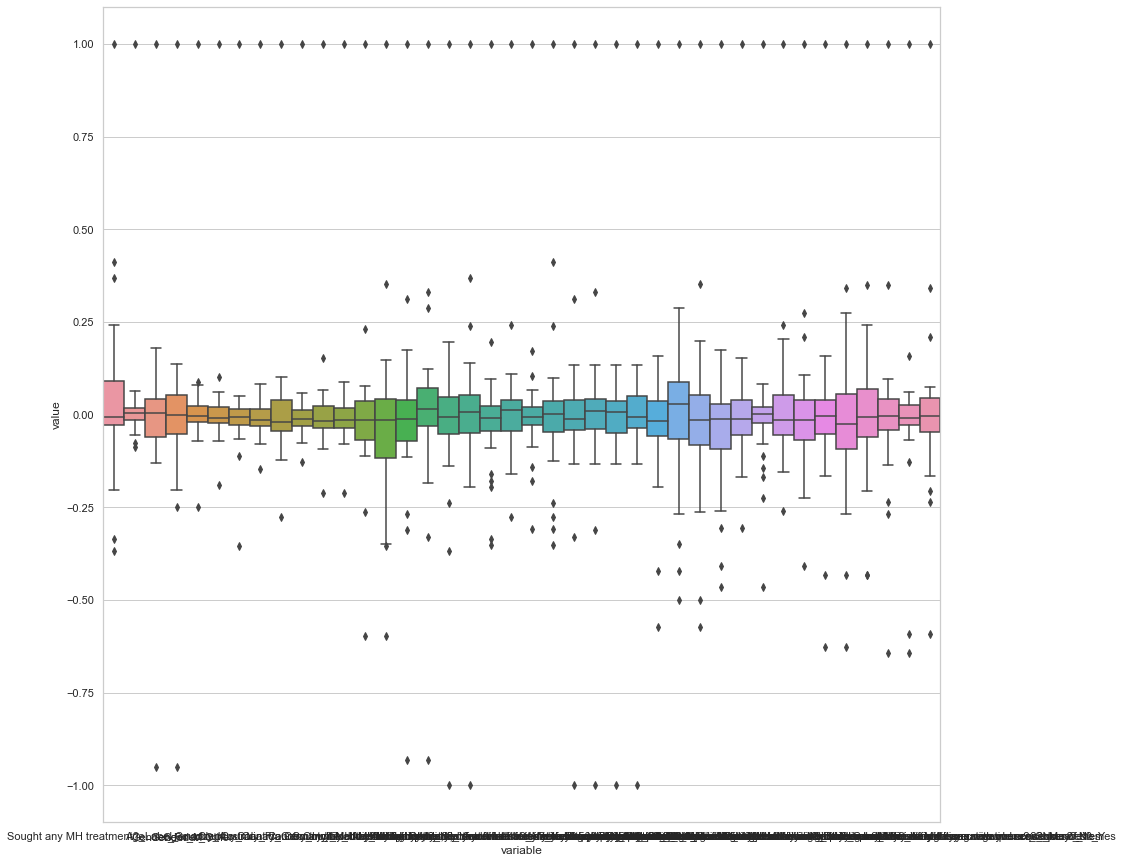

In [33]:
plt.figure(figsize = [15,15])
sns.set(style = "whitegrid")
sns.boxplot(x = "variable", y = "value", data = pd.melt(data.corr()), width = 1)

plt.show()

In [34]:
# Remove special characters from column names
data.columns = [re.sub('[^A-Za-z0-9_]+', '', col) for col in data.columns]

In [35]:
data.columns

Index(['SoughtanyMHtreatment_Label_encoded', 'Age', 'Gender_F', 'Gender_M',
       'Gender_Other', 'Country_Australia', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Ireland',
       'Country_Netherlands', 'Country_UnitedKingdom', 'Country_UnitedStates',
       'selfemployed_No', 'selfemployed_Yes',
       'Anyfamilyhistoryofmentalillness_No',
       'Anyfamilyhistoryofmentalillness_Yes',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Never',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Often',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Rarely',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Sometimes',
       'workremotelyatleast50ofthetime_No',
       'workremotelyatleast50ofthetime_Yes', 'youremployeratechOrg_No',
       'youremployeratechOrg_Yes', 'OrgprovideMHbenefits_Dontknow',
       'OrgprovideMHbenefits_No', 'OrgprovideMHbenefits_Yes',
       'HoweasytotakemedicalleaveforaMHconditio

Now, we're crafting three distinct sets of features, each possessing different levels of correlation with the target variable. This endeavor is undertaken to comprehend the impact of features on the efficiency of the model. By constructing these sets, we can systematically evaluate how individual attributes influence the model's predictive prowess and determine which combination yields the most accurate outcomes. This process enables us to uncover the significance of each feature, ultimately aiding in the optimization of the model's performance.

In [36]:
# Define sets of features with different correlations
features1 = ['SoughtanyMHtreatment_Label_encoded', 'Age', 'Gender_F', 'Gender_M',
       'Gender_Other', 'Country_Australia', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Ireland',
       'Country_Netherlands', 'Country_UnitedKingdom', 'Country_UnitedStates',
       'selfemployed_No', 'selfemployed_Yes',
       'Anyfamilyhistoryofmentalillness_No',
       'Anyfamilyhistoryofmentalillness_Yes',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Never',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Often',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Rarely',
       'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Sometimes',
       'workremotelyatleast50ofthetime_No',
       'workremotelyatleast50ofthetime_Yes']
features2 = ['SoughtanyMHtreatment_Label_encoded','youremployeratechOrg_No',
       'youremployeratechOrg_Yes', 'OrgprovideMHbenefits_Dontknow',
       'OrgprovideMHbenefits_No', 'OrgprovideMHbenefits_Yes',
       'HoweasytotakemedicalleaveforaMHcondition_Dontknow',
       'HoweasytotakemedicalleaveforaMHcondition_Somewhatdifficult',
       'HoweasytotakemedicalleaveforaMHcondition_Somewhateasy',
       'HoweasytotakemedicalleaveforaMHcondition_Verydifficult',
       'HoweasytotakemedicalleaveforaMHcondition_Veryeasy']
features3 = ['SoughtanyMHtreatment_Label_encoded','DoyouthinkthatdiscussingaMHissuewithyouremployerwouldhavenegativeconsequences_Maybe',
       'DoyouthinkthatdiscussingaMHissuewithyouremployerwouldhavenegativeconsequences_No',
       'DoyouthinkthatdiscussingaMHissuewithyouremployerwouldhavenegativeconsequences_Yes',
       'WouldyoubewillingtodiscussaMHissuewithyourcoworkers_No',
       'WouldyoubewillingtodiscussaMHissuewithyourcoworkers_Someofthem',
       'WouldyoubewillingtodiscussaMHissuewithyourcoworkers_Yes']

# Iterate through each set of features
for features in [features1, features2, features3]:
    # Split the data into features (X) and target (y)
    X = data[features[1:]]  # Exclude the target variable from features
    y = data[features[0]]    # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest model
    model = RandomForestClassifier(random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy and feature set
    print("Features:", features[1:])
    print("Accuracy:", accuracy)
    print("\n")

Features: ['Age', 'Gender_F', 'Gender_M', 'Gender_Other', 'Country_Australia', 'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Netherlands', 'Country_UnitedKingdom', 'Country_UnitedStates', 'selfemployed_No', 'selfemployed_Yes', 'Anyfamilyhistoryofmentalillness_No', 'Anyfamilyhistoryofmentalillness_Yes', 'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Never', 'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Often', 'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Rarely', 'IfMHconditiondoyoufeelthatitinterfereswithyourwork_Sometimes', 'workremotelyatleast50ofthetime_No', 'workremotelyatleast50ofthetime_Yes']
Accuracy: 0.7619047619047619


Features: ['youremployeratechOrg_No', 'youremployeratechOrg_Yes', 'OrgprovideMHbenefits_Dontknow', 'OrgprovideMHbenefits_No', 'OrgprovideMHbenefits_Yes', 'HoweasytotakemedicalleaveforaMHcondition_Dontknow', 'HoweasytotakemedicalleaveforaMHcondition_Somewhatdifficult', 'Howeasytotakemedicall

In the set 1, a combination of various features, including age, gender, country, employment status, family history of mental illness, and work-related factors, has been included. The accuracy achieved is 76.19%. This indicates that these features collectively contribute to a relatively higher accuracy in the model's predictions.

The second feature set encompasses attributes related to the respondent's organization, the availability of mental health benefits, and the ease of taking medical leave for a mental health condition. The accuracy obtained is 60.17%. This suggests that these features have a lower impact on the model's predictive accuracy compared to the first set.

The third feature set incorporates factors related to the perception of discussing mental health issues with employers and coworkers. The accuracy achieved is 61.47%, indicating a moderate influence of these features on the model's predictive performance.

In [37]:
#tried for label and one hot
y = data["SoughtanyMHtreatment_Label_encoded"]

In [38]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: SoughtanyMHtreatment_Label_encoded, dtype: int32

In [39]:
#tried for one hot and label
data.drop(["SoughtanyMHtreatment_Label_encoded"], axis = 1, inplace = True)

In [40]:
X = data

In [41]:
#Splitting the dataset into trainig and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [42]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Initial Accuracy:", accuracy)

Initial Accuracy: 0.8614718614718615


# 86.14% Accuracy

In this feature set, all available features from the dataset have been included for training the model. The achieved accuracy of 86.15% indicates that utilizing the entire array of features results in the highest predictive accuracy for the model's outcomes.

The inclusion of a wide range of attributes, such as age, gender, country, employment-related factors, perceptions about discussing mental health, and more, contributes significantly to the model's ability to make accurate predictions. This suggests that a comprehensive set of features provides the model with a broader context and more relevant information, leading to better insights and outcomes.